In [1]:
# SVM_Baseline.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, os, time

from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
from scipy.sparse import load_npz

sns.set(style="whitegrid")
SEED = 42
np.random.seed(SEED)


In [2]:
# Load TF-IDF features and labels
X_train = load_npz("X_train_tfidf.npz")
X_test = load_npz("X_test_tfidf.npz")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (26882, 5000)
Test shape: (6721, 5000)


In [3]:
from sklearn.model_selection import GridSearchCV

# Define baseline model
svm_linear = LinearSVC(random_state=SEED, max_iter=5000)

# Hyperparameter grid
param_grid = {'C': [0.1, 1, 5, 10]}

# GridSearch for best C
grid = GridSearchCV(
    svm_linear,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

start = time.time()
grid.fit(X_train, y_train)
end = time.time()

print(f"Training done in {end - start:.2f} sec")
print("Best C:", grid.best_params_['C'])
print("Best CV accuracy:", grid.best_score_)


Training done in 5.54 sec
Best C: 1
Best CV accuracy: 0.9877985046538609



Test Accuracy: 0.9882

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      3288
        Spam       0.99      0.99      0.99      3433

    accuracy                           0.99      6721
   macro avg       0.99      0.99      0.99      6721
weighted avg       0.99      0.99      0.99      6721



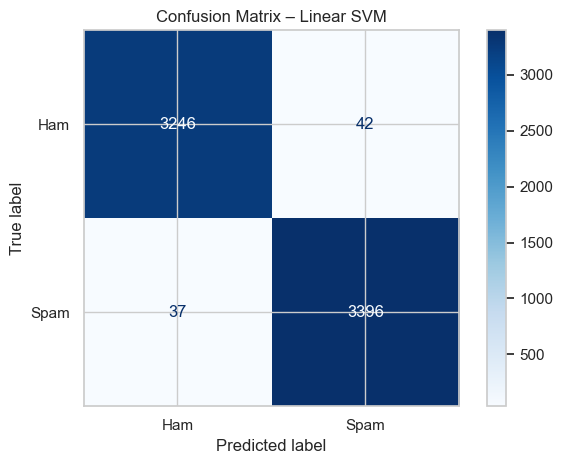

In [4]:
best_svm = grid.best_estimator_

# Predictions
y_pred = best_svm.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Ham", "Spam"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Linear SVM")
plt.tight_layout()
plt.show()


In [ ]:
Try RBF SVM (non-linear kernel)

To show comparison with a non-linear model

In [5]:
svm_rbf = SVC(kernel='rbf', random_state=SEED)
param_grid_rbf = {'C': [0.5, 1, 2], 'gamma': ['scale', 0.1, 0.01]}

grid_rbf = GridSearchCV(
    svm_rbf,
    param_grid_rbf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_rbf.fit(X_train[:3000], y_train[:3000])  # smaller subset for speed
print("\nRBF SVM Best Params:", grid_rbf.best_params_)
print("RBF Best CV Accuracy:", grid_rbf.best_score_)

y_pred_rbf = grid_rbf.best_estimator_.predict(X_test)
print("RBF Test Accuracy:", accuracy_score(y_test, y_pred_rbf))



RBF SVM Best Params: {'C': 1, 'gamma': 'scale'}
RBF Best CV Accuracy: 0.9776666666666666
RBF Test Accuracy: 0.9805088528492784


In [6]:
with open("svm_linear_model.pkl", "wb") as f:
    pickle.dump(best_svm, f)

print("✅ Saved model as svm_linear_model.pkl")


✅ Saved model as svm_linear_model.pkl
